# Practica del curso "Introduccion a la geointeligencia computacional"

trabajo por: Pablo Murillo

### Instalamos snscrape desde nuestra consola con:
pip install snscrape
### Instalamos simplejson desde nuestra consola con:
pip install simplejson

## Preparacion

#### En caso de no contar con una linea de comandos para realziar la instalación con pip install, ejecute la siguiente linea

In [ ]:
!pip install snscrape
!pip install simplejson
!pip install geopandas
!pip install contextily

     |████████████████████████████████| 130 kB 4.2 MB/s 
     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 15.4 MB 19.2 MB/s 
     |████████████████████████████████| 6.3 MB 44.4 MB/s 
     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [ ]:
#Importamos la libreria que nos permite hacer las busquedas en twitter
import snscrape.modules.twitter as twitter

## Obtención de tuits

In [ ]:
query = "atropellado"
limit = 5

In [ ]:
#Obtiene los tuits segun el limite marcado con -limit- en los que mencionamos la palabra atropellado o lo mencionado en -query- 

for i , tweet in enumerate(twitter.TwitterSearchScraper(query).get_items()):
    if i == limit:
        break
    print(tweet, tweet.content, "\n" )

https://twitter.com/elresumennews/status/1468393364336914433 #CHIHUAHUA | 🚨️🚑 ¡Para Ripley!; #Muere hombre #atropellado por una #ambulancia 👇👇👇

https://t.co/wivE7zwqqs 

https://twitter.com/Telemundo62/status/1468392427526492160 A más de tres meses desde que Armani fue atropellado junto con su madre en Filadelfia, el pequeño pudo regresar a casa pese a que su madre falleció en el hospital: 
https://t.co/TwCZNDw998 

https://twitter.com/daniel_mp/status/1468391844233068544 @AugustaCornejo Sra. el video, ( que produce la indignación) por la forma en que la clínica se niega a internar al paciente, el bombero le pregunta a la empleada de la clínica, “Me quiere decir que necesita un DNI para estabilizar y poner una vía a un paciente atropellado” please vea el video🙏🏻 

https://twitter.com/CaraotaDigital/status/1468390880126119944 Tras salir de una fiesta hombre falleció tras ser atropellado en Catia   💥 https://t.co/cB9u9tKHf1 

https://twitter.com/RexMarin/status/1468388691164938242 @Teno

In [ ]:
#Obtenemos los atributos asiganados a cada tuit
for i , tweet in enumerate(twitter.TwitterSearchScraper(query).get_items()):
    if i == limit:
        break
    print(tweet, tweet._asdict , "\n" )

https://twitter.com/elresumennews/status/1468393364336914433 <bound method Tweet._asdict of Tweet(url='https://twitter.com/elresumennews/status/1468393364336914433', date=datetime.datetime(2021, 12, 8, 1, 33, 54, tzinfo=datetime.timezone.utc), content='#CHIHUAHUA | 🚨️🚑 ¡Para Ripley!; #Muere hombre #atropellado por una #ambulancia 👇👇👇\n\nhttps://t.co/wivE7zwqqs', id=1468393364336914433, username='elresumennews', outlinks=['https://elresumen.net/para-ripley-muere-hombre-atropellado-por-una-ambulancia/'], outlinksss='https://elresumen.net/para-ripley-muere-hombre-atropellado-por-una-ambulancia/', tcooutlinks=['https://t.co/wivE7zwqqs'], tcooutlinksss='https://t.co/wivE7zwqqs')> 

https://twitter.com/Telemundo62/status/1468392427526492160 <bound method Tweet._asdict of Tweet(url='https://twitter.com/Telemundo62/status/1468392427526492160', date=datetime.datetime(2021, 12, 8, 1, 30, 10, tzinfo=datetime.timezone.utc), content='A más de tres meses desde que Armani fue atropellado junto con su

# Georreferenciación

In [ ]:
import requests
import simplejson as json 

In [ ]:
#Creamos la funcion para obtener coordenadas de un tuit en la busqieda de un texto
def geoparseMX(text):
    """Geoparsing service for mexican spanish
       see http://geoparsing.geoint.mx/mx/info/
    """
    geoparser_url = "http://geoparsing.geoint.mx/ws/"
    data = dict({"text" : text})
    try:
        response = requests.post(geoparser_url, json = data, headers={"Content-Type":"application/json"})
        jresponse = response.json()
        print(json.dumps(jresponse, encoding="utf8", indent=2, ensure_ascii=False))
        for e in jresponse['entities']:
            place = e['nominatim'][0]
            if place['geojson']['type'] == 'Point':
                coords = place['geojson']['coordinates']
                return coords
    except Exception as e:
        coords = None
    return None

In [ ]:
g = geoparseMX("Mi nombre es Alexei y soy originario de la ciudad de México, trabajo al lado del angel de la independencia")

{
  "labeled": "Mi nombre es Alexei y soy originario de la <START:location> ciudad de México <END> , trabajo al lado del angel de la independencia\n",
  "entities": [
    {
      "index": 1,
      "entity": "ciudad de México",
      "context": "la <START:location> ciudad de México <END> , trabajo al lado del angel de la independencia",
      "nominatim": [
        {
          "address": {
            "city": "Ciudad de México",
            "country": "México",
            "country_code": "mx",
            "county": "Cuauhtémoc",
            "postcode": "06060",
            "state": "CDMX"
          },
          "boundingbox": [
            "19.2726009",
            "19.5926009",
            "-99.2933416",
            "-98.9733416"
          ],
          "category": "place",
          "display_name": "Ciudad de México, Cuauhtémoc, CDMX, 06060, México",
          "geojson": {
            "coordinates": [
              -99.1333416,
              19.4326009
            ],
            "type

In [ ]:
print(g)

[-99.1333416, 19.4326009]


In [ ]:
f = geoparseMX("Hola soy Alexei, me encanto la posada de la casa de la juventud, siento que la ciudad de León Guanajuato va a crecer mucho estos proximos años")

{
  "labeled": "Hola soy Alexei , me encanto la posada de la casa de la juventud , siento que la <START:location> ciudad de León Guanajuato <END> va a crecer mucho estos proximos años\n",
  "entities": [
    {
      "index": 1,
      "entity": "ciudad de León Guanajuato",
      "context": "de la casa de la juventud , siento que la <START:location> ciudad de León Guanajuato <END> va a crecer mucho estos proximos años",
      "nominatim": []
    }
  ]
}


In [ ]:
print(f)

None


## Mapa


In [ ]:
query = "atropellado"
points = []
for i, tweet in enumerate(twitter.TwitterSearchScraper(query).get_items()):
    try:
        if len(points) == 5:
              break
        coords = geoparseMX(tweet.content)
        if coords != None:
            print(len(Points))
            points.append(coords)
    except:
        continue

In [ ]:
points

NameError: ignored

In [ ]:
def mapplot(list_points):
    """Points to Map"""
    geometry_points = [Point(x,y) for x, y in list_points]
    geodf = GeoDataFrame(geometry_points, crs="EPSG:4326", geometry=0)
    CRS_df = geodf.to_crs(epsg=3857)
    ax = CRS_df.plot()
    # we are using an extent around Mexico for the examples
    ax.axis((-13000000, -9700000, 1800000, 3900000))
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
    plt.show()

In [ ]:
from shapely.geometry import Point
from geopandas import GeoDataFrame
import contextily as ctx
import matplotlib.pyplot as plt

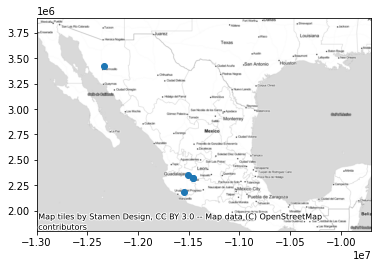

In [ ]:
mapplot(points)